## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print('Has nulls X:', any(X.isnull().sum()))
print('Has nulls y:', y.dtype != 'int32' or len(y[(y > 2) | (y < 0)]) > 0)
print()
X.isnull().sum()

Has nulls X: False
Has nulls y: False



alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
for col in X:
    print(len(X[col].unique()), X[col].dtype)
# Категориальных переменных нет.

126 float64
133 float64
79 float64
63 float64
53 float64
97 float64
132 float64
39 float64
101 float64
132 float64
78 float64
122 float64
121 float64


Задача 1.2 (0.5 балла) Используя функцию train_test_split(), разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать np.random.seed() для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=132)
X_train.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
57,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0
32,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
normalizer.fit(X_train)

X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)

X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

X_train_normalized

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.765702,-0.609931,-0.647842,1.058880,0.532410,-0.492356,-0.061048,-0.032836,-0.092171,-1.302903,0.425209,0.455032,-1.290027
1,0.026886,-0.573950,0.711165,-0.375234,-0.155286,0.202296,0.293958,-0.456962,-0.411214,-0.334657,0.689632,-0.192362,1.033555
2,0.328825,-0.286105,1.201918,-0.757665,0.119792,1.051315,1.129267,-0.287311,0.001665,0.439055,0.469280,0.282393,1.538017
3,-1.294095,1.027191,-1.365096,-0.056542,-0.911752,-0.492356,-0.530910,0.221640,0.395777,-1.647758,-0.147707,0.584510,-0.620468
4,0.026886,3.159049,-0.874343,0.740188,-0.980522,0.464720,0.523668,-0.372137,0.658518,-1.064157,-1.029117,0.656443,-1.183020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-0.866348,0.145664,0.371413,0.580842,-0.155286,0.372100,-0.040166,-0.032836,-0.655188,-0.975733,-0.720624,1.059266,-1.005694
120,-1.042479,0.667384,-0.157090,-0.056542,-0.292825,-1.650110,-1.731667,0.476116,-1.743687,0.217994,-1.337611,-1.170645,-0.785565
121,-0.388279,-0.430028,-0.610092,-0.120281,-0.980522,-0.183622,0.398372,-0.711438,0.208104,-0.489400,0.865914,0.713989,-0.161867
122,0.869798,-0.771844,0.522414,-0.789534,0.532410,1.668784,1.588687,-1.305214,0.714819,0.792752,-0.323989,0.325553,1.583877


In [7]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = [1, 3, 5, 10, 15, 25]
k_clsfiers = list()

X_train_two_columns = X_train_normalized[['alcohol', 'magnesium']]
X_test_two_columns = X_test_normalized[['alcohol', 'magnesium']]

nn, train, test = list(), list(), list()

for k in num_neighbors:
    nn.append(k)
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(X_train_two_columns.values, y_train)
    k_clsfiers.append(clf)

    y_predicted_test = clf.predict(X_test_two_columns.values)
    y_predicted_train = clf.predict(X_train_two_columns.values)

    test.append(np.mean(y_test == y_predicted_test))
    train.append(np.mean(y_train == y_predicted_train))

data = {'NN': nn, 'Train': train, 'Test': test}
res = pd.DataFrame(data)
res.set_index('NN', inplace=True)
res

,Train,Test
NN,,
1,1.000000,0.611111
3,0.774194,0.611111
5,0.758065,0.629630
10,0.790323,0.666667
15,0.750000,0.685185
25,0.717742,0.611111


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

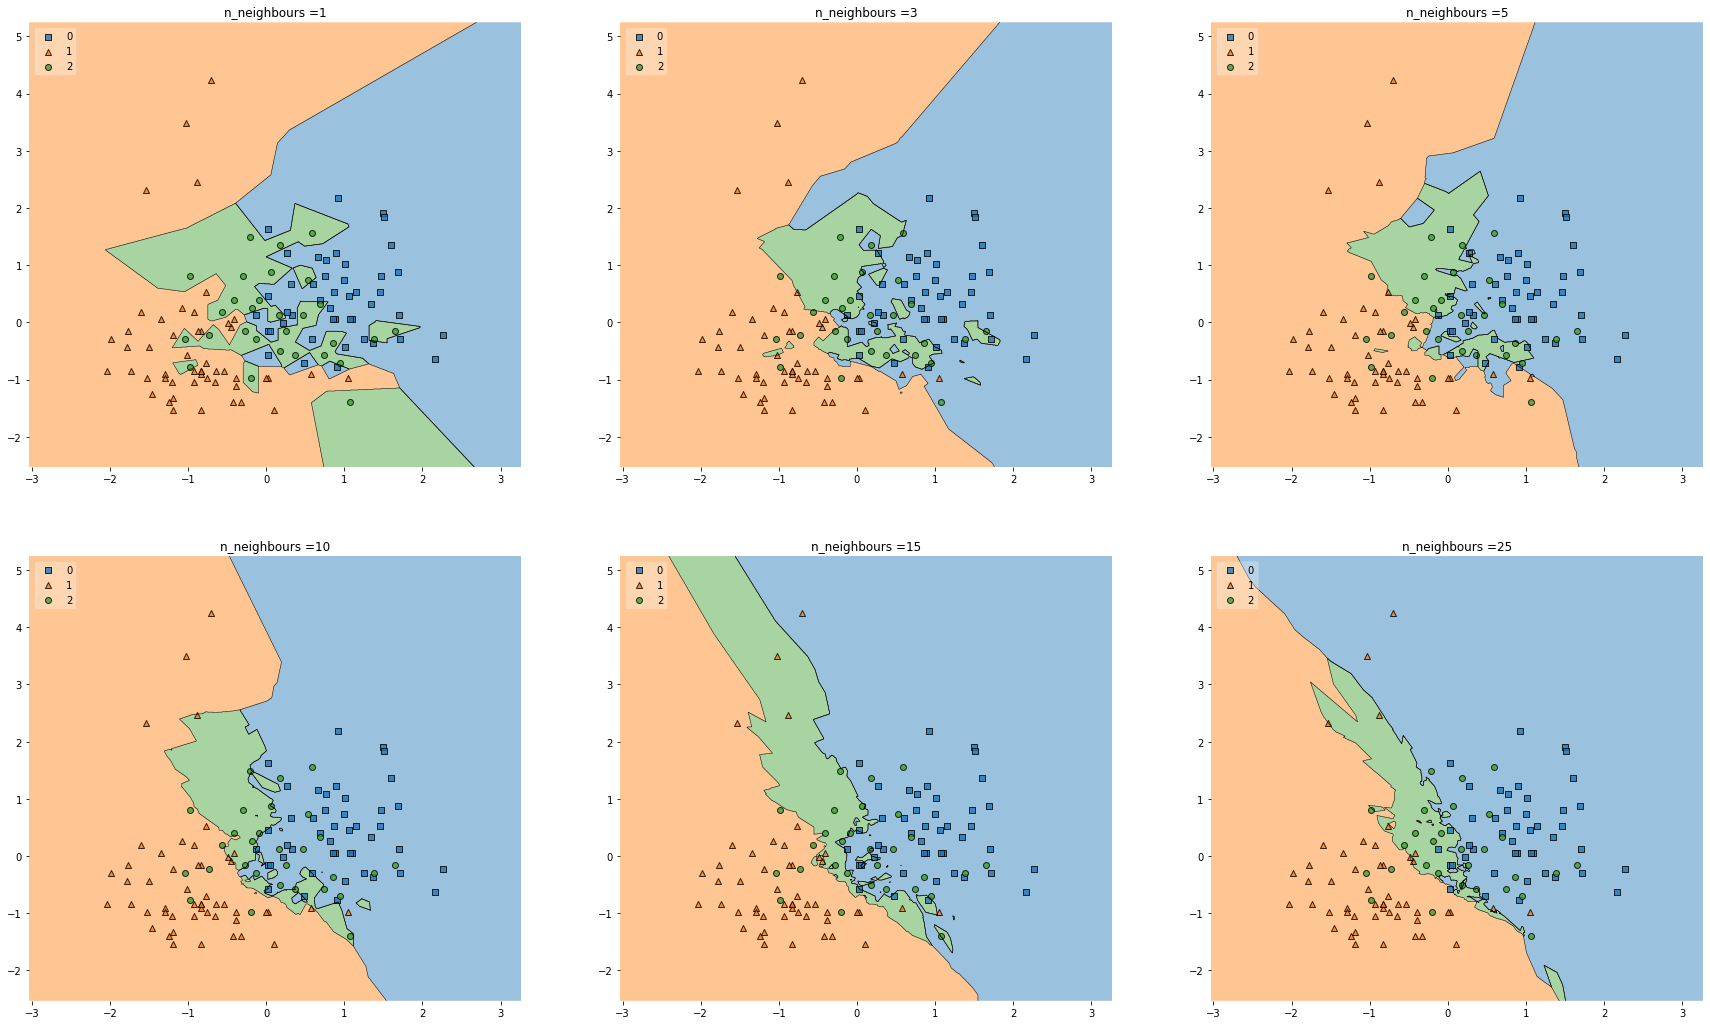

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
# Увеличили размер, чтобы был более приятный масштаб.
fig = plt.figure(figsize=(30, 18))
labels = ['n_neighbours =' + str(x) for x in num_neighbors]

for clf, lab, grd in zip(k_clsfiers,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_two_columns.to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Из задания 1.3 напрашивается вывод, что следует использовать около 15 соседей. Однако, если посмотреть на поверхности, видно, что зеленые круги - это немного вытянутая и довольно широкая полоска между синими квадратами и оранжевыми треугольниками. То есть второй класс является чем-то переходным между нулевым и первым. Если взять много соседей-полоска слишком сузится, так как в эти соседи будет попадать все больше и больше соседних классов, иначе, если взять соседей мало, то никакой полоски не будет и все разобьется на какие-то группы. Есть предположение, что при других разбиениях лучший результат будут давать 20-30 соседей, так как зеленый класс скорее кажется должен быть между двумя другими, но не так сильно размазан. Вообще сильно заметно, что не хватает признаков, по которым мы определяем целевую переменную, потому что если смотреть только по этим двум признакам, видно, что зеленый класс сильно замешан между двумя другими и хорошо вычленить его не представляется возможным.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

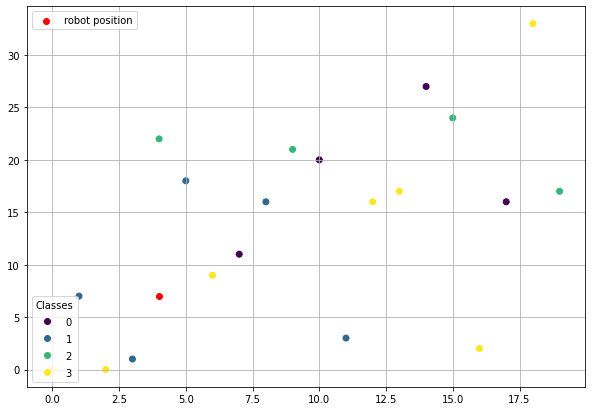

In [10]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20))  # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(x, landmarks, c=random_classes)
ax.scatter(4, 7, c='r', marker='o', label='robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
class MobileRobot:
    def __init__(self, k, initial_position, landmarks, classes):
        """
        Attributes:
        ------
        k: int
            Number of neighbours

        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)

        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points

        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks

        """
        # Store the history of movements
        self.trajectory = [initial_position]

        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(landmarks, classes)

        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]),
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}

    def move(self):
        go_right = bool(np.random.binomial(1, 0.2, 1)[0])
        if go_right:
            next_move = self.trajectory[-1] + self.mapping[0]
        else:
            next_move = self.trajectory[-1] + self.mapping[self.knn.predict(self.trajectory[-1].reshape((1, 2)))[0]]

        self.trajectory.append(next_move)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [13]:
def conduct_experiment(x,
                       mean=0,
                       std=2,
                       n_movements=10,
                       k=3,
                       initial_position=np.array([10, 20])):
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T

    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size=len(x))

    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)

    for n in range(n_movements):
        robot.move()

    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c=classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)

    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1],
            c='r', marker='o', label='robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

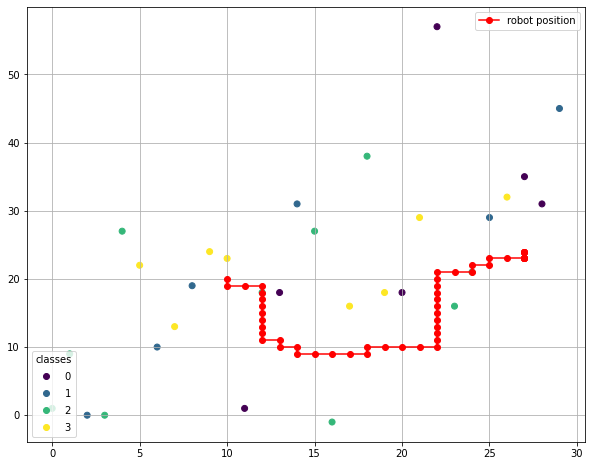

In [14]:
x = np.arange(30)
conduct_experiment(x, mean=3, std=10, k=5, n_movements=50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

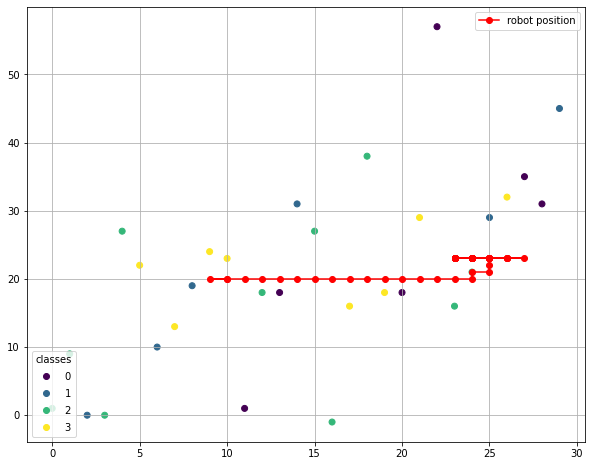

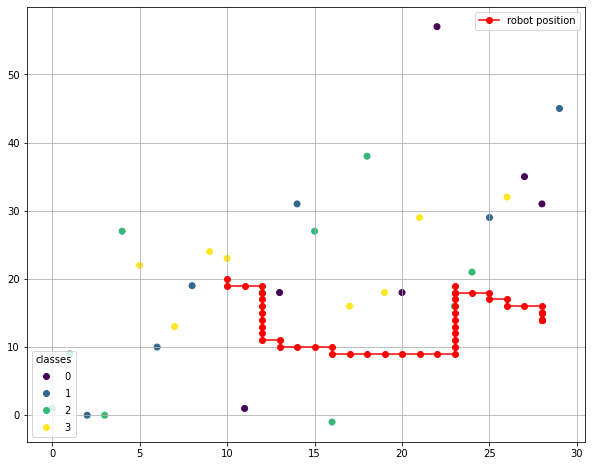

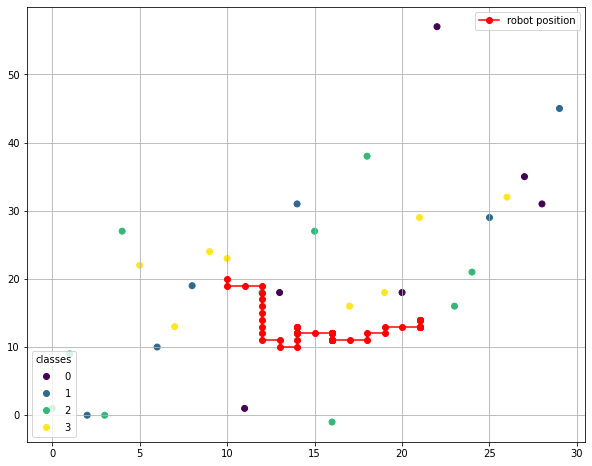

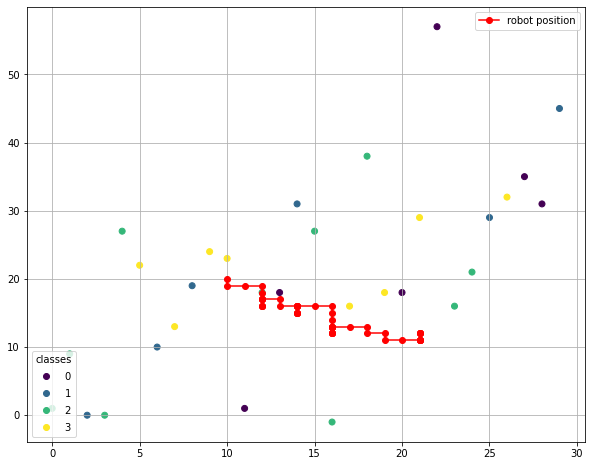

In [15]:
conduct_experiment(x, mean=3, std=10, k=2, n_movements=50)
conduct_experiment(x, mean=3, std=10, k=8, n_movements=50)
conduct_experiment(x, mean=3, std=10, k=15, n_movements=50)
conduct_experiment(x, mean=3, std=10, k=20, n_movements=50)
# Большее число соседей в нашем эксперименте увеличивает движение в разные стороны.
# Если бы классы были осмысленны - то на каждом шаге робот бы шел ближе к классу, к которому
# вероятно он принадлежит.
# И если бы было четкое разделение на группы, то с каждым шагом его траектория становилась бы
# прямолинейней (его как бы сильнее утягивало в сторонну доминирующего класса).

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [16]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [17]:
print('Has nulls:', any(data.isnull().sum()))
print()
data.isnull().sum()

Has nulls: False



Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [18]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [19]:
for col in data.columns:
    print(col, ':', data[col].dtype)

carat : float64
cut : object
color : object
clarity : object
depth : float64
table : float64
price : int64
x : float64
y : float64
z : float64


In [20]:
reg_cols = [col for col in data.columns if data[col].dtype == 'float64']
reg_cols.append('price')

data[reg_cols].corr()['price']
# Больше всего коррелируют carat и длины по осям.

carat    0.921591
depth   -0.010647
table    0.127134
x        0.884435
y        0.865421
z        0.861249
price    1.000000
Name: price, dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [21]:
data_one_hot = pd.get_dummies(data, drop_first=True)
data_one_hot

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    data_one_hot[data_one_hot.columns[data_one_hot.columns != 'price']],
    data_one_hot['price'], test_size=0.3, random_state=337)
X_train.head(8)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32945,0.34,62.4,56.0,4.45,4.49,2.79,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
12749,1.10,61.1,58.0,6.61,6.69,4.06,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
20808,1.23,61.7,57.0,6.87,6.84,4.23,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4065,0.31,61.4,58.0,4.33,4.36,2.67,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
49982,0.73,60.6,59.0,5.81,5.77,3.51,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9834,1.01,63.9,57.0,6.36,6.29,4.04,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19630,1.03,62.0,56.0,6.50,6.54,4.04,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11910,1.01,66.2,56.0,6.05,6.10,4.02,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [23]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()

normalizer.fit(X_train.iloc[:, :6])

X_train_normalized = normalizer.transform(X_train.iloc[:, :6])
X_test_normalized = normalizer.transform(X_test.iloc[:, :6])

X_train_normalized = pd.DataFrame(np.hstack([X_train_normalized[:, :6],
                                             X_train.iloc[:, 6:].values]),
                                  columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(np.hstack([X_test_normalized[:, :6],
                                            X_test.iloc[:, 6:].values]),
                                 columns=X_test.columns, index=X_test.index)

X_train_normalized

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32945,-0.967235,0.456899,-0.649600,-1.143867,-1.080332,-1.077537,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12749,0.635079,-0.451878,0.245547,0.781166,0.825074,0.748911,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20808,0.909160,-0.032442,-0.202027,1.012883,0.954988,0.993396,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4065,-1.030484,-0.242160,0.245547,-1.250813,-1.192924,-1.250115,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49982,-0.144995,-0.801408,0.693120,0.068191,0.028268,-0.042070,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,0.424249,1.645301,1.588267,0.558361,0.461315,0.734530,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26600,3.165049,0.037464,-0.202027,2.447746,2.349399,2.431545,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12729,0.487498,-0.871314,1.588267,0.620747,0.634533,0.518808,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14402,0.550747,-1.640280,-0.202027,0.879200,0.790430,0.619478,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_normalized, y_train)

y_predicted_train_std = lr.predict(X_train_normalized)
y_predicted_test_std = lr.predict(X_test_normalized)

print('MSE on train:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train_std), 3))
print('MSE on test:', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test_std), 3))

MSE on train: 1265624.198
MSE on test: 1303210.922


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [25]:
np.array([lr.feature_names_in_, lr.coef_]).T
# Больше всего оценка переменной carat, что логично, ведь это вес драгоценности.
# Так же большие оценки у ясности (clarity), что для человека, который в этом не разбирается,
# думаю не так очевидно, и у икса. Остальные оценки по модулю уже не так велики.

array([['carat', 5309.126930695657],
       ['depth', -80.62329831949671],
       ['table', -61.511903451960926],
       ['x', -1086.1191670403618],
       ['y', 13.21888668678896],
       ['z', -53.77235183861803],
       ['cut_Good', 522.0606803395322],
       ['cut_Ideal', 770.664114963252],
       ['cut_Premium', 701.2866327054012],
       ['cut_Very Good', 665.8898149527839],
       ['color_E', -194.3020809984246],
       ['color_F', -270.7671481524093],
       ['color_G', -483.1434663892001],
       ['color_H', -972.9225736931087],
       ['color_I', -1460.2890027964766],
       ['color_J', -2358.873826390407],
       ['clarity_IF', 5342.5184470739405],
       ['clarity_SI1', 3665.7437372178406],
       ['clarity_SI2', 2687.674232954927],
       ['clarity_VS1', 4581.298858067731],
       ['clarity_VS2', 4260.978554042315],
       ['clarity_VVS1', 5011.029564226567],
       ['clarity_VVS2', 4965.986139674661]], dtype=object)

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [26]:
from sklearn.linear_model import Lasso, Ridge

reg = 10
linregs = [Lasso(reg), Ridge(reg)]
names = ['Lasso', 'Ridge']

for linreg, name in zip(linregs, names):
    linreg.fit(X_train_normalized, y_train)

    y_predicted_train = linreg.predict(X_train_normalized)
    y_predicted_test = linreg.predict(X_test_normalized)
    print(name)
    print('MSE on train:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train), 3))
    print('MSE on test:', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test), 3))
    print()
# В ridge регресси веса изменились весьма слабо. В lasso же заметно сильнее.
# Судя по Lasso регрессии, все же наблюдалась мультиколлинеарность.

Lasso
MSE on train: 1496917.238
MSE on test: 1526687.465

Ridge
MSE on train: 1269581.527
MSE on test: 1307388.892



In [27]:
print('Lasso:')
np.array([linregs[0].feature_names_in_, linregs[0].coef_]).T

Lasso:


array([['carat', 4757.916099768342],
       ['depth', -149.32481078292946],
       ['table', -104.74528441677555],
       ['x', -704.1752098675048],
       ['y', -0.0],
       ['z', -0.0],
       ['cut_Good', -0.0],
       ['cut_Ideal', 161.4306828124614],
       ['cut_Premium', 67.79125767738061],
       ['cut_Very Good', 74.21079586863216],
       ['color_E', 8.983311428612694],
       ['color_F', -0.0],
       ['color_G', -120.76303046911185],
       ['color_H', -602.2199558145413],
       ['color_I', -1000.4269570017556],
       ['color_J', -1767.8031555980713],
       ['clarity_IF', 1369.514803730377],
       ['clarity_SI1', 68.3822350769874],
       ['clarity_SI2', -748.4284483681307],
       ['clarity_VS1', 894.2733232204058],
       ['clarity_VS2', 643.7268243057696],
       ['clarity_VVS1', 1231.0344751919008],
       ['clarity_VVS2', 1246.7297973515579]], dtype=object)

In [28]:
print('Ridge:')
np.array([linregs[1].feature_names_in_, linregs[1].coef_]).T

Ridge:


array([['carat', 5260.039808583066],
       ['depth', -84.66905435638249],
       ['table', -63.77640244229053],
       ['x', -1053.4019254713423],
       ['y', 12.860315249678338],
       ['z', -49.642890463147616],
       ['cut_Good', 552.1512309731002],
       ['cut_Ideal', 805.6833202169719],
       ['cut_Premium', 732.5076650281674],
       ['cut_Very Good', 701.9880699043978],
       ['color_E', -183.0223028676667],
       ['color_F', -259.15342628205735],
       ['color_G', -465.98932459746464],
       ['color_H', -956.5548600142836],
       ['color_I', -1436.9112430552213],
       ['color_J', -2322.6465051501523],
       ['clarity_IF', 4766.4151995959755],
       ['clarity_SI1', 3135.278757418952],
       ['clarity_SI2', 2165.117508026162],
       ['clarity_VS1', 4041.3776930600443],
       ['clarity_VS2', 3726.878650380264],
       ['clarity_VVS1', 4457.514111075879],
       ['clarity_VVS2', 4419.312918325842]], dtype=object)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

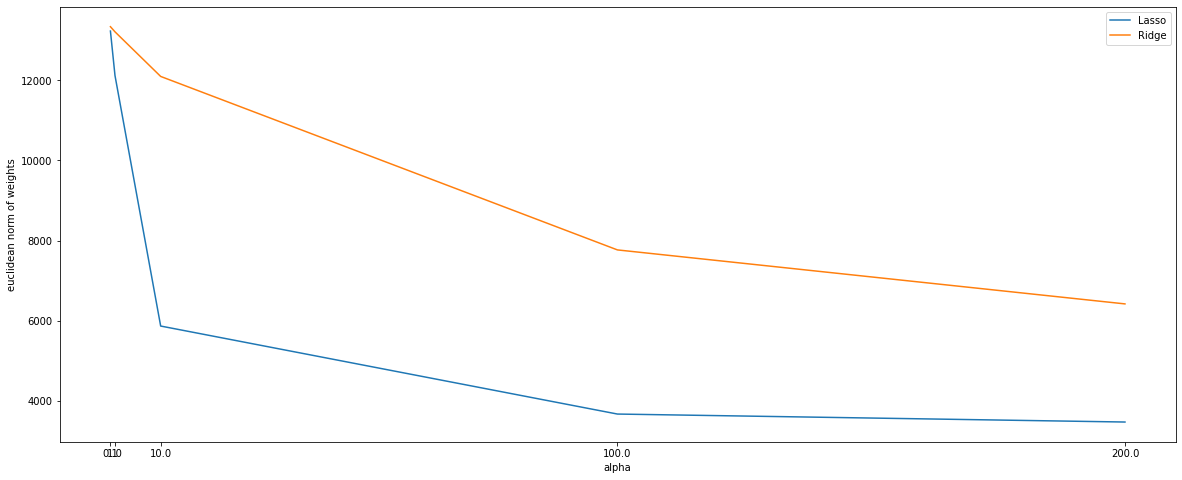

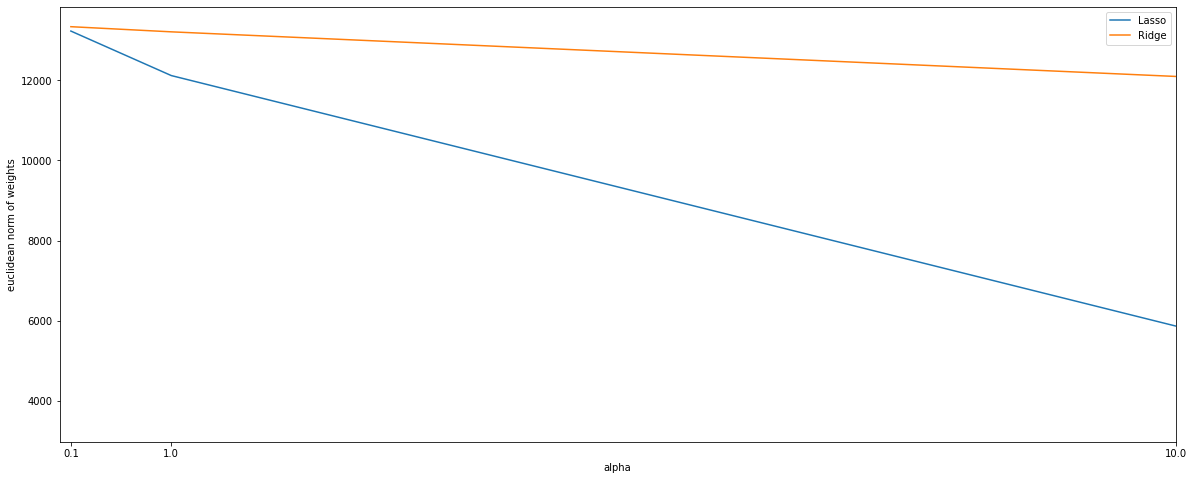

In [29]:
# Чтобы не делать сабплот и дважды отобразить одну и ту же фигуру
from IPython.display import display

alphas = [0.1, 1, 10, 100, 200]
y1 = list()
y2 = list()
x = list()

for alpha in alphas:
    lasso = Lasso(alpha)
    ridge = Ridge(alpha)
    lasso.fit(X_train_normalized, y_train)
    ridge.fit(X_train_normalized, y_train)

    y1.append(np.linalg.norm(lasso.coef_))
    y2.append(np.linalg.norm(ridge.coef_))

_, ax = plt.subplots(figsize=(20, 8))

ax.set_xticks(alphas)
ax.set_xlabel('alpha')
ax.set_ylabel('euclidean norm of weights')

ax.plot(alphas, y1, label='Lasso')
ax.plot(alphas, y2, label='Ridge')
ax.legend()

fig = plt.gcf()
plt.show()
ax.set_xlim(0, 10)
display(fig)

# Агрессивнее снижает веса lasso регрессия. Ее используют для отбора информативных признаков, так как она
# Быстро устремляет веса неинформативных признаков к нулю.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [30]:
from sklearn.linear_model import LassoCV

cv_num = 5

lasso_cv = LassoCV(cv=cv_num, alphas=alphas)

lasso_cv.fit(X_train_normalized, y_train)
res = pd.DataFrame(lasso_cv.mse_path_, index=['{}'.format(x) for x in lasso_cv.alphas_])
res

,0,1,2,3,4
200.0,2.491086e+06,2.320429e+06,2.527491e+06,2.352264e+06,2.459391e+06
100.0,2.287315e+06,2.109643e+06,2.322976e+06,2.144575e+06,2.262696e+06
10.0,1.535597e+06,1.360414e+06,1.598868e+06,1.431030e+06,1.574984e+06
1.0,1.344413e+06,1.182800e+06,1.341571e+06,1.188232e+06,1.313669e+06
0.1,1.343218e+06,1.181725e+06,1.338100e+06,1.182414e+06,1.305734e+06


In [31]:
mean = res.mean(axis=1)

res_alpha = 0
for col_name, data in mean.items():
    if abs(data - min(mean)) < 1:
        print('Optimal alpha:')
        print("col_name:", col_name, "\nval:", data)
        res_alpha = float(col_name)

mean

Optimal alpha:
col_name: 0.1 
val: 1270238.1810806016


200.0    2.430132e+06
100.0    2.225441e+06
10.0     1.500179e+06
1.0      1.274137e+06
0.1      1.270238e+06
dtype: float64

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [32]:
lasso = Lasso(res_alpha)
lasso.fit(X_train_normalized, y_train)

np.array([lasso.feature_names_in_, lasso.coef_]).T
# Наиболее информативны все так же carat и clarity.
# Как уже говорилось выше, весьма очевидно, что огромный вклад в цену
# дает вес алмаза. А clarity-видимо среди ювелиров весьма важно,
# насколько ясный камешек.

array([['carat', 5303.568240339479],
       ['depth', -82.00563174483823],
       ['table', -62.100655252711846],
       ['x', -1082.868450173323],
       ['y', 10.4736626391523],
       ['z', -50.19574076310778],
       ['cut_Good', 512.1593341260663],
       ['cut_Ideal', 761.1366585063095],
       ['cut_Premium', 691.5666849739954],
       ['cut_Very Good', 656.7220810308664],
       ['color_E', -189.04437093589368],
       ['color_F', -265.57071796135955],
       ['color_G', -477.42243615849026],
       ['color_H', -967.1579508674025],
       ['color_I', -1453.5662411708736],
       ['color_J', -2350.806772819855],
       ['clarity_IF', 5288.958708544211],
       ['clarity_SI1', 3616.3306120457623],
       ['clarity_SI2', 2638.668550547389],
       ['clarity_VS1', 4530.754764622023],
       ['clarity_VS2', 4211.210436266706],
       ['clarity_VVS1', 4959.421946046625],
       ['clarity_VVS2', 4915.062558058095]], dtype=object)

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [33]:
y_predicted_train = lasso.predict(X_train_normalized)
y_predicted_test = lasso.predict(X_test_normalized)
print('Lasso:')
print('MSE on train:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train), 3))
print('MSE on test:', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test), 3))
print()
print('Standart:')
print('MSE on train:', round(mean_squared_error(y_true=y_train, y_pred=y_predicted_train_std), 3))
print('MSE on test:', round(mean_squared_error(y_true=y_test, y_pred=y_predicted_test_std), 3))
print()

# Стандартная регрессия имеет чуть лучший показатель. Скорее всего, это отличие почти незначительно
# так как все равно наибольшие веса имеют carat и clarity и они в двух моделях почти одинаковы.

Lasso:
MSE on train: 1265668.497
MSE on test: 1303452.784

Standart:
MSE on train: 1265624.198
MSE on test: 1303210.922

